In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

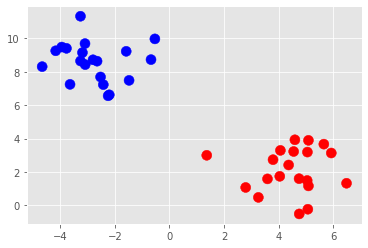

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [3]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [4]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
print(x_min, x_max, y_min, y_max)

-4.665344913694041 6.487246392154996 -0.5112914593103839 11.329633858834494


In [5]:
# Store decision boundaries in mesh grid
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
print(XX)

[[-4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491
  -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491]
 [-3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491
  -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491]
 [-2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491
  -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491]
 [-1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491
  -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491]
 [-0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491
  -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491]
 [ 0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509
   0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509]
 [ 1.33465509  1.33465509  1.33465509  1.33465509  1.33465509  1.33465509
   1.33465509  1.33465509  1.334

In [6]:
# Use the decision_function function to identify sides of the hyperplane
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z)

[ 2.79983696e-01  3.25552530e-03 -2.73472645e-01 -5.50200816e-01
 -8.26928987e-01 -1.10365716e+00 -1.38038533e+00 -1.65711350e+00
 -1.93384167e+00 -2.21056984e+00 -2.48729801e+00 -2.76402618e+00
  5.60529135e-01  2.83800965e-01  7.07279384e-03 -2.69655377e-01
 -5.46383548e-01 -8.23111719e-01 -1.09983989e+00 -1.37656806e+00
 -1.65329623e+00 -1.93002440e+00 -2.20675257e+00 -2.48348074e+00
  8.41074575e-01  5.64346404e-01  2.87618233e-01  1.08900624e-02
 -2.65838108e-01 -5.42566279e-01 -8.19294450e-01 -1.09602262e+00
 -1.37275079e+00 -1.64947896e+00 -1.92620713e+00 -2.20293530e+00
  1.12162001e+00  8.44891843e-01  5.68163673e-01  2.91435502e-01
  1.47073309e-02 -2.62020840e-01 -5.38749011e-01 -8.15477181e-01
 -1.09220535e+00 -1.36893352e+00 -1.64566169e+00 -1.92238986e+00
  1.40216545e+00  1.12543728e+00  8.48709112e-01  5.71980941e-01
  2.95252770e-01  1.85245994e-02 -2.58203571e-01 -5.34931742e-01
 -8.11659913e-01 -1.08838808e+00 -1.36511625e+00 -1.64184443e+00
  1.68271089e+00  1.40598

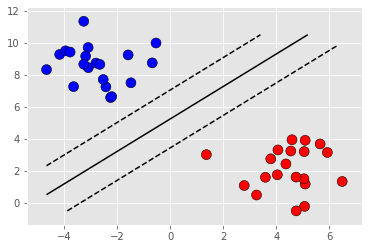

In [7]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

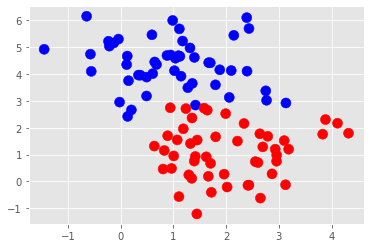

In [6]:
# Demonstrate that support vectors will sometimes cross the margin
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [7]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

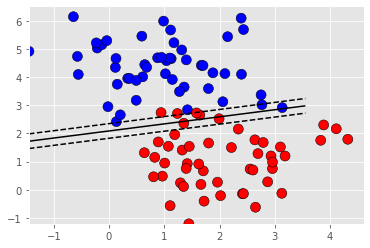

In [9]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [10]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

